# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [36]:
# Import the appropriate libraries with aliases
import numpy as np
import pandas as pd

# Create two new dataframes
ndf = pd.read_csv('NorthCallCenter.csv')
sdf = pd.read_csv('SouthCallCenter.csv')

ndf['Sale'] = ndf['Sale'].str.strip().str.upper()
ndf.rename(columns={"Unnamed: 0": "id"}, inplace=True)
ndf.set_index("id", inplace=True)
ndf = ndf.fillna(np.nan)
ndf = ndf.drop_duplicates()

sdf.rename(columns={"Unnamed: 0": "id"}, inplace=True)
sdf.set_index("id", inplace=True)
sdf = sdf.drop_duplicates()


columns_list = sdf.columns.tolist()
print(columns_list)
for each in columns_list:
    print(sdf[each].unique())

['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time', 'Calls']
['South']
['Sales Support' 'Product Support' 'Complaint']
['10:00 AM' '12:00 PM' '1:00 PM' '11:00 AM' '2:00 PM' '3:00 PM' '4:00 PM'
 '5:00 PM' '9:00 AM']
['Incoming' 'Outgoing']
['D' 'C']
['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']
['NO' 'YES']
[0 1]
[0 1]
[ 9  8 10 12 11]
[1 2 3]
[ 1.  2.  3.  4.  5. nan]
[2 4 3]
[1]


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  


In [2]:
# EDA Question 1A solution below:
n_rep_list = (ndf["Rep ID"].unique())
print(len(n_rep_list))

9


#### EDA Question 1B:  How many reps are in the South branch?  


In [3]:
# EDA Question 1B solution Below:
s_rep_list = (sdf["Rep ID"].unique())
print(len(s_rep_list))

11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 



In [4]:
# EDA Question 2A solution Below:
navg_busy_min = round(ndf["Busy Minutes"].mean(), 2)
navg_not_rdy_min = round(ndf["Not Ready Minutes"].mean(), 2)
navg_inc_wait_time = round(ndf["Incoming Wait Time"].mean(), 2)
navg_dur_wait_time = round(ndf["During Call Wait Time"].mean(), 2)


print("Average busy minutes: " + str(navg_busy_min))
print("Average not ready minutes: " + str(navg_not_rdy_min))
print("Average incoming wait time(seconds): " + str(navg_inc_wait_time))
print("Average during call wait time(minutes): " + str(navg_dur_wait_time))

Average busy minutes: 9.98
Average not ready minutes: 1.92
Average incoming wait time(seconds): 3.04
Average during call wait time(minutes): 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
# EDA Question 2B solution Below:
savg_busy_min = round(sdf["Busy Minutes"].mean(), 2)
savg_not_rdy_min = round(sdf["Not Ready Minutes"].mean(), 2)
savg_inc_wait_time = round(sdf["Incoming Wait Time"].mean(), 2)
savg_dur_wait_time = round(sdf["During Call Wait Time"].mean(), 2)


print("Average busy minutes: " + str(savg_busy_min))
print("Average not ready minutes: " + str(savg_not_rdy_min))
print("Average incoming wait time(seconds): " + str(savg_inc_wait_time))
print("Average during call wait time(minutes): " + str(savg_dur_wait_time))

Average busy minutes: 10.07
Average not ready minutes: 1.91
Average incoming wait time(seconds): 3.0
Average during call wait time(minutes): 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# EDA Question 3 solution Below:
both_df = pd.concat([ndf,sdf],ignore_index=True)

timeblockcounts = both_df["Time Block"].value_counts()
print(timeblockcounts)


Time Block
12:00 PM    117
10:00 AM     98
3:00 PM      73
2:00 PM      65
11:00 AM     55
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: count, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.98
> - Not Ready Minutes = 1.92
> - Incoming Wait Time = 3.04
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.07
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 98
> - 11:00AM  = 55
> - 12:00PM  = 117
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [7]:
# Question 1 solution below
#both_df.info()
#both_df = both_df.fillna(np.nan)
#both_df["Incoming Wait Time"].value_counts(dropna=False)
both_df.describe()


,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,554.000000,554.000000,554.000000,554.000000,206.000000,554.000000,554.0
mean,0.028881,0.019856,10.034296,1.915162,3.014563,3.030686,1.0
std,0.167623,0.139630,1.402883,0.821295,1.370341,0.831651,0.0
min,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### Record your answer below:

> Your Answer: The incoming wait time column is missing values but this does not make other data invalid so I'll leave the data points as "nan".

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [8]:
# Cleaning Question 2 solution below:
#print(ndf['Sale'].unique())
#ndf['Sale'] = ndf['Sale'].str.strip().str.upper() ####From top of file####

##### Record your answer by below:
> Your Answer: when initially cleaning the csv files, I used a for loop on each column and applied the unique method to give me an overview of the data entries. Then I used .strip() & .Upper() to standardize the entries.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [9]:
# Cleaning Question 3 solution below:
#ndf = ndf.drop_duplicates()
#ndf = sdf.drop_duplicates()

##### Record your answer below:
> Your Answer: when cleaning the data sets I used .drop_duplicates() to remove them from the data set.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [10]:
# Cleaning Question 4 solution below:
#ndf.rename(columns={"Unnamed: 0": "id"}, inplace=True)
#ndf.set_index("id", inplace=True)

##### Record your answer below:
> Your Answer: for both data sets I renamed the "unnamed: 0" column to "id" and set_index("id").

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [11]:
# Create dataframe for the entire company named df
df = pd.concat([ndf,sdf],ignore_index=True)
#print(df.describe().to_string())
print(df.std)


<bound method DataFrame.std of     Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID  \
0    North        Complaint    9:00 AM             Incoming     B   Brent   
1    North    Sales Support   11:00 AM             Incoming     A     Cam   
2    North    Sales Support   11:00 AM             Incoming     B    Todd   
3    North    Sales Support    4:00 PM             Incoming     B   Brent   
4    North  Product Support   12:00 PM             Incoming     B   Brent   
..     ...              ...        ...                  ...   ...     ...   
549  South  Product Support    5:00 PM             Outgoing     D   Helga   
550  South  Product Support    5:00 PM             Outgoing     C   Susan   
551  South  Product Support    5:00 PM             Outgoing     C   Sandy   
552  South  Product Support    5:00 PM             Outgoing     C    Eric   
553  South  Product Support    5:00 PM             Outgoing     D  George   

    Sale  Lost Call  Abandoned  Busy Minutes

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [12]:
# Manipulation Question solution below:
br_repid_for_sum = df.groupby(['Branch', 'Rep ID'])['Calls'].sum().reset_index()
topcalls_sort = br_repid_for_sum.sort_values(by='Calls', ascending=False)

top_reps = topcalls_sort.groupby('Branch').first().reset_index()
print(top_reps)

  Branch Rep ID  Calls
0  North  Brent     37
1  South   Eric     35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [13]:
# Manipulation Question 2 solution below:
# Totals
totalcompanycalls = df["Abandoned"].value_counts().sum() #554 aka total company data
total_n_calls = df[df["Branch"]=="North"]["Abandoned"].value_counts().sum() #total north branch calls
total_s_calls = df[df["Branch"]=="South"]["Abandoned"].value_counts().sum() #total south branch calls

#abandoned count
s_abandon_count = df[df["Branch"]=="South"]["Abandoned"].sum() #south branch abandon count
n_abandon_count = df[df["Branch"]=="North"]["Abandoned"].sum() #north branch abandon count
total_abandon_count = s_abandon_count + n_abandon_count

company_wide_rate = round(total_abandon_count / totalcompanycalls * 100, 2) #company percentage abandonment rate
south_abandonment_rate = round(s_abandon_count / total_s_calls * 100, 2) #South percentage abandonment rate
north_abandonment_rate = round(n_abandon_count / total_n_calls * 100, 2) #north percentage abandonment rate

print(north_abandonment_rate)
print(south_abandonment_rate)
print(company_wide_rate)

2.88
1.29
1.99


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.88%
- South Branch = 1.29%
- Company Wide = 1.99%
- Do any of these fall out of the optimal range of 2-5%?
The overall company is just about 2% even and the south branch is under the optimal range of 2-5%. The north branch is within the optimal 2-5%

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [14]:
# Manipulation Question 3 solution below:
# calls filtered for incoming & per branch
t_incoming = df[df["Incoming or Outgoing"]=="Incoming"].shape[0]
n_incoming = df[(df["Incoming or Outgoing"]=="Incoming") & (df["Branch"]=="North")].shape[0]
s_incoming = df[(df["Incoming or Outgoing"]=="Incoming") & (df["Branch"]=="South")].shape[0]
#incoming calls with passing criteria
s_iwt_good = df[(df["Branch"] == "South") & (df["Incoming or Outgoing"]== "Incoming") & (df["Incoming Wait Time"] <= 2)].shape[0] #.shape[0] to get the row count of the filtered data without summing the seconds in the column
n_iwt_good = df[(df["Branch"] == "North") & (df["Incoming or Outgoing"]== "Incoming") & (df["Incoming Wait Time"] <= 2)].shape[0] #.shape[0] to get the row count of the filtered data without summing the seconds in the column
t_iwt_good = s_iwt_good + n_iwt_good

#percentage rates rounded
n_iwt_good_rate = round(n_iwt_good / n_incoming * 100, 2)
s_iwt_good_rate = round(s_iwt_good / s_incoming * 100, 2)
t_iwt_good_rate = round(t_iwt_good / t_incoming * 100, 2)

print(str(n_iwt_good) +" Calls - " + str(n_iwt_good_rate)+"percent")
print(str(s_iwt_good) +" calls - " + str(s_iwt_good_rate)+"percent")
print(str(t_iwt_good) +" calls - " + str(t_iwt_good_rate)+"percent")


33 Calls - 40.74percent
48 calls - 38.4percent
81 calls - 39.32percent


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.74%, 33/81 calls
- South Branch = 38.40%, 48/125 calls
- Company Wide = 39.32%, 81/206 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [15]:
# Manipulation Question 4 solution below:
n_avg_ans_speed = df[(df["Incoming or Outgoing"]=="Incoming") & (df["Branch"]=="North")]["Incoming Wait Time"].mean()
s_avg_ans_speed = df[(df["Incoming or Outgoing"]=="Incoming") & (df["Branch"]=="South")]["Incoming Wait Time"].mean()
t_avg_ans_speed = df[(df["Incoming or Outgoing"]=="Incoming")]["Incoming Wait Time"].mean()
print(round(n_avg_ans_speed,2))
print(s_avg_ans_speed)
print(round(t_avg_ans_speed,2))

3.04
3.0
3.01


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.01

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/q2/c8thy5d901lc5m5ygppj1ss40000gn/T/ipykernel_6344/2798283575.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


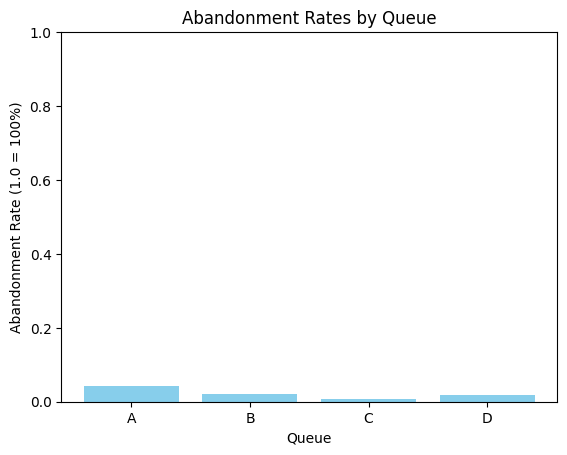

In [16]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 


plt.bar(abandonment_rates.keys(), abandonment_rates.values(), color='skyblue')
plt.title('Abandonment Rates by Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate (1.0 = 100%)')
plt.ylim(0,1)
plt.show()

##### Record your answer below:

> Chart style you chose and why: I used a bar graph so I could display each queue in a side by side comparison.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

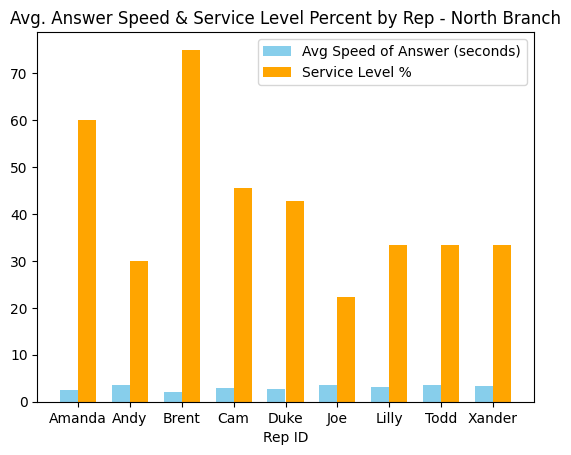

In [35]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = ndf.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = ndf[ndf["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = ndf[ndf["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

service_level.reset_index(inplace=True) #to make Rep ID a column instead of the "ID"

#Variables for readability
reps = north_plt["Rep ID"]
avg_speed = north_plt["Incoming Wait Time"]
serve_lvl = service_level["Service Level %"]
bar_width = 0.35
x = np.arange(len(reps))


fig, ax = plt.subplots()
bars1 = ax.bar(x - bar_width/2, avg_speed, width=bar_width, label='Avg Speed of Answer (seconds)', color='skyblue')
bars2 = ax.bar(x + bar_width/2, serve_lvl, width=bar_width, label='Service Level %', color='orange')

ax.set_xlabel('Rep ID')
ax.set_title('Avg. Answer Speed & Service Level Percent by Rep - North Branch')
ax.set_xticks(x)
ax.set_xticklabels(reps)
ax.legend()

plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a double bar graph so each rep could be compared side by side against multiple stats

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

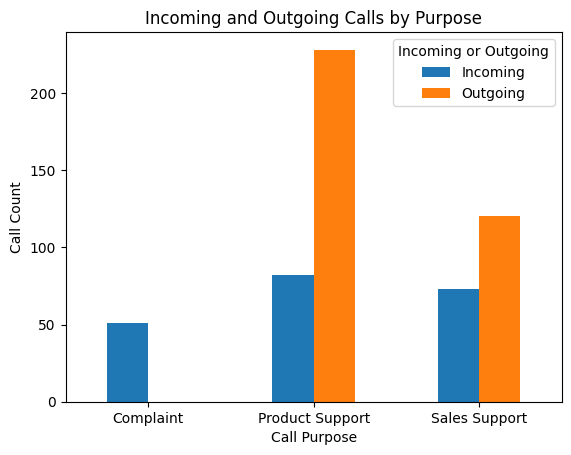

In [32]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
#print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

#unstack to make the incoming/outgoing into its own column for easier plotting
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts().unstack() 
#print(purpose_counts)

#using .plot because with unstack, data is set up to easily compare both counts without more setup using .plt .
purpose_counts.plot(kind="bar",legend=True,title="Incoming and Outgoing Calls by Purpose",xlabel="Call Purpose",ylabel="Call Count")
plt.xticks(rotation=0)
plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose a double bar graph because using the unstack method on the provided data we can easily show side-by-side comparisons for each call purpose.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: The North branch has greater efficiency compared to the South branch. With a smaller team, they manage to be busy for fewer minutes overall and achieve quicker average call wait times. Additionally, it's worth highlighting that the top rep in the North branch for call count handled 5.7% more calls than their counterpart in the South branch.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: South Branch

The South branch has higher overall call volume and longer in-call waiting which suggests that they could benefit more from the added help. Increasing the number of reps in the South branch could help improve KPIs.

The North branch is currently operating efficiently with fewer representatives and shorter in-call wait times and fewer busy minutes. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: The training hours each rep has had. The individual reps could display drastically different results depending on their tenure at the company and how knowlegable they are about the subject they are handling in calls.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

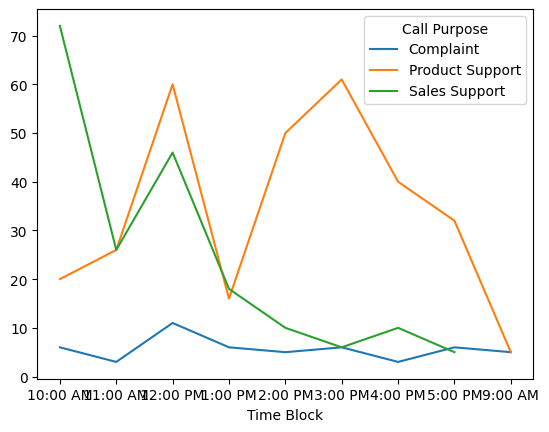

In [112]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]


# Use groupby to plot based on time blocks:
time_grouped = call_times.groupby(["Time Block"])

unstacked_valuecounts = time_grouped["Call Purpose"].value_counts().unstack()
#stacked_valuecounts = time_grouped["Incoming or Outgoing"].value_counts()

unstacked_valuecounts.plot(kind="line")
#graph_ready = unstacked_valuecounts.get_group()

# Use groupby and get_group to select which call purpose to plot:
""" graph_ready = time_grouped.get_group(("11:00 AM",))
graph_ready.plot(kind="line",legend=True,title="Incoming and Outgoing Calls by Purpose",xlabel="",ylabel="Call Count")
"""
plt.show() 